In [15]:
%matplotlib inline
import scipy.special, cmath
import random, math, pylab, os, numpy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.image
import pylab
import mpl_toolkits.mplot3d

In [2]:
import mayavi.mlab

In [3]:
#padding on the y axis between label and axis
plt.rcParams['ytick.major.pad']='10'

dpi_out = 400
fig_width = 3.39
golden_mean = (np.sqrt(5)-1.0)/2.0    # Aesthetic ratio
fig_height = fig_width*golden_mean # height in inches
MAX_HEIGHT_INCHES = 8.0
if fig_height > MAX_HEIGHT_INCHES:
    print("WARNING: fig_height too large:" + fig_height + 
          "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
    fig_height = MAX_HEIGHT_INCHES
#fig, ax = plt.subplots(figsize = (fig_width, fig_height), dpi=400, frameon=True)
small_tick_size = 8
small_label_size = 8

# Dynamics of an isolated spin

## Naive dynamics

### Plotting facility

In [4]:
up   = matplotlib.image.imread('spin_up.png')
down = matplotlib.image.imread('spin_down.png')
img = 0
if not os.path.isdir('output'): os.mkdir('output')
def snapshot(state, T, t):
    global img
    fig = pylab.figure(frameon=False, figsize=(260 / 100., 270 / 100.), dpi=100)
    ax = pylab.Axes(fig, [0, -0.05, 1., float(241) / float(270) -0.05])
    ax.set_axis_off()
    fig.add_axes(ax)
    if state == 1:
        ax.imshow(up, aspect='auto')
    elif state == -1:
        ax.imshow(down, aspect='auto')
    pylab.text(0.1, 1.05, 'T = ' + str(T), horizontalalignment='left', verticalalignment='bottom',
                transform=ax.transAxes, fontsize=20, color = '#700000', fontweight='bold')
    pylab.text(0.12, 0.94, 't = ' + str(t), horizontalalignment='left', verticalalignment='bottom',
                transform=ax.transAxes, fontsize=20, color = '#202157', fontweight='bold')
    fig.savefig('output/%03d.png' % img, transparent=True)
    img += 1
    pylab.show()
    pylab.close(fig)

### Simulation of the time evolution

0


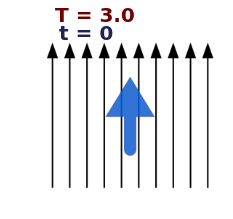

1


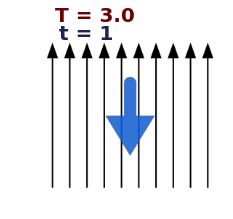

2


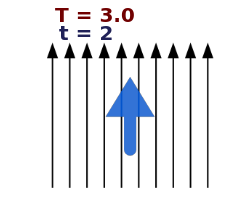

3


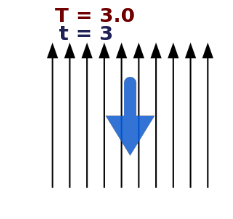

4


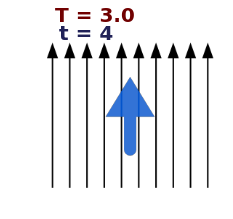

5


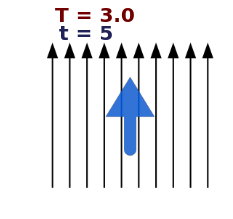

6


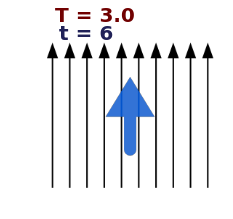

7


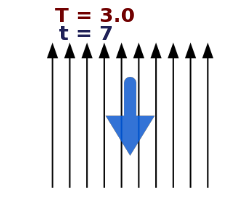

8


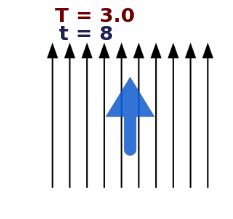

9


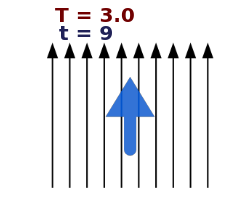

In [5]:
h = 1.0
T = 3.
p = math.exp(- 2.0 * h / T)
tmax = 10
sigma = 1
for t in range(tmax):
    print t
    snapshot(sigma, T, t)
    if sigma == -1:
        sigma = 1
    elif random.uniform(0.0, 1.0) < p:
        sigma = -1

## Dice-rolling approach

In [6]:
t_max = 25
for t in range(t_max):
    if random.randint(1, 6) == 1:
        print t, 'flip'
    else:
        print t

0
1
2
3
4
5
6 flip
7
8
9
10
11
12
13
14 flip
15 flip
16
17
18
19
20 flip
21
22
23
24


## Faster than the clock: single spin dynamics

In [7]:
log_lambda = math.log(5.0 / 6.0)
t_max = 25
t = 0
while t < t_max:
    Upsilon = random.uniform(0.0, 1.0)
    delta_t = 1 + int(math.log(Upsilon) / log_lambda)
    t += delta_t
    print t, 'flip'

1 flip
6 flip
25 flip


# EXERCISE

## Faster than the clock: magnetization for a single spin

In [28]:
# Compute the magnetization induced by a single spin
# in the field h.
# use a maximum of t_max time
# compute the average of M over time, and compare it to the exact result given below.

h = 1.0
beta = 2.0

t_max = 100000000


print 'magnetization:'
print 'exact result: ', math.tanh(beta * h)

magnetization:
exact result:  0.964027580076


## Faster than the clock: Ising model, naive approach

In [9]:
def tower_sample(weights):
    sum_w = sum(weights)
    w_cumulative = [0.0]
    for l in range(len(weights)):
        w_cumulative.append(w_cumulative[l] + weights[l])
    eta = sum_w * random.uniform(0.0, 1.0)
    kmin = 0
    kmax = len(w_cumulative)
    while True:
        k = int((kmin + kmax) / 2)
        if w_cumulative[k] < eta:
            kmin = k
        elif w_cumulative[k - 1] > eta:
            kmax = k
        else:
            return k - 1

L = 6
N = L * L
nbr = {i : ((i // L) * L + (i + 1) % L, (i + L) % N,
            (i // L) * L + (i - 1) % L, (i - L) % N)
                                    for i in range(N)}

S = [random.choice([1, -1]) for k in range(N)]
E = -0.5 * sum(S[k] * sum(S[nn] for nn in nbr[k]) for k in range(N))
tot_spin_flips = N * 10000
T = 2.0
beta = 1.0 / T
E_tot = 0.0
t_tot = 0
n_spin_flips = 0
p = [0] * N
while n_spin_flips < tot_spin_flips:
    for j in range(N):
        h = sum(S[nn] for nn in nbr[j])
        delta_E = 2.0 * h * S[j]
        p[j] = min(1.0, math.exp(- beta * delta_E)) / float(N)
    log_lambda = math.log(1.0 - sum(p))
    Upsilon = random.uniform(0.0, 1.0)
    delta_t = 1 + int(math.log(Upsilon) / log_lambda)
    k = tower_sample(p)
    E_tot += delta_t * E
    t_tot += delta_t
    n_spin_flips += 1
    E += 2.0 * S[k] * sum(S[nn] for nn in nbr[k])
    S[k] *= -1
print 'T = %f, E_av = %f' %(T, E_tot / float(t_tot) / N)

T = 2.000000, E_av = -1.746069


In [10]:
def naive_tower_sample(weights, sum_w):
    w_cumulative = [0.0]
    for l in range(len(weights)):
        w_cumulative.append(w_cumulative[l] + weights[l])
    eta = sum_w * random.uniform(0.0, 1.0)
    for k in range(1, len(w_cumulative)):
        if eta < w_cumulative[k]:
            return k - 1

def init_classes(S, N, nbr):
    class_to_site = {k:[] for k in range(10)}
    site_to_class = {}
    dict_class = {(1, 4):0, (1, 2):1, (1, 0):2, (1, -2):3, (1, -4):4,
             (-1, 4):5, (-1, 2):6, (-1, 0):7, (-1, -2):8, (-1, -4):9}
    for site in range(N):
        h = sum(S[nn] for nn in nbr[site])
        class_site = dict_class[(S[site], h)]
        site_to_class[site] = class_site
        class_to_site[class_site].append(site)
    return class_to_site, site_to_class

def f_neighb(old_class_neighbour, old_class_site):
    if old_class_neighbour < 5: 
        return (old_class_site + 1)
    else:                       
        return (old_class_site - 1)

In [11]:
L = 6
N = L * L
nbr = {i : ((i // L) * L + (i + 1) % L, (i + L) % N,
            (i // L) * L + (i - 1) % L, (i - L) % N)
                                    for i in range(N)}
S = [random.choice([1, -1]) for k in range(N)]
E = -0.5 * sum(S[k] * sum(S[nn] for nn in nbr[k]) for k in range(N))
T = 2.0
beta = 1.0 / T
class_to_site, site_to_class = init_classes(S, N, nbr)
delta_E = [8, 4, 0, -4, -8, -8, -4, 0, 4, 8]
p_metropolis = [min(1.0, math.exp(-beta * delta_E[k])) / float(N) for k in range(10)]
tot_spin_flips = N * 50000
E_tot = 0.0
t = 0
n_spin_flips = 0
while n_spin_flips < tot_spin_flips:
    p = [len(class_to_site[k]) * p_metropolis[k] for k in range(10)]
    delta_t = 1 + int(math.log(random.uniform(0.0, 1.0)) / math.log(1.0 - sum(p)))
    E_tot += delta_t * E
    t += delta_t
    n_spin_flips += 1
    old_class_k = naive_tower_sample(p, sum(p))
    new_class_k = (old_class_k + 5) % 10 
    k = random.choice(class_to_site[old_class_k])
    class_to_site[old_class_k].remove(k)
    class_to_site[new_class_k].append(k)
    site_to_class[k] = new_class_k
    for m in nbr[k]:
        old_class_m = site_to_class[m]
        new_class_m = f_neighb(old_class_k, old_class_m)
        class_to_site[old_class_m].remove(m)
        class_to_site[new_class_m].append(m)
        site_to_class[m] = new_class_m
    E += delta_E[old_class_k]
    S[k] *= -1
print 'T = %f, E_av = %f' %(T, E_tot / float(t) / N)

T = 2.000000, E_av = -1.747152


# Close-packing of spheres

## Direct sampling: $r_{max}$ from a a valid configuration

In [12]:
def unit_sphere():
    x = [random.gauss(0.0, 1.0) for i in range(3)]
    norm =  math.sqrt(sum(xk ** 2 for xk in x))
    return [xk / norm for xk in x]

def draw_sphere(center, rad, col, ax, resolution):
    delta = numpy.pi / float(resolution)
    u, v = numpy.mgrid[0:2 * numpy.pi + delta:delta, 0:numpy.pi + delta * 0.5:delta * 0.5]
    x = center[0] + rad * numpy.cos(u) * numpy.sin(v)
    y = center[1] + rad * numpy.sin(u) * numpy.sin(v)
    z = center[2] + rad * numpy.cos(v)
    ax.plot_wireframe(x, y, z, color=col)

In [13]:
N = 13
positions = [unit_sphere() for j in range(N)]
dists = [math.sqrt(sum((positions[k][j] - positions[l][j]) ** 2 for j in range(3))) 
         for l in range(N) 
         for k in range(l)]
rmax = min(dists) / 2.0
R = 1.0 / (1.0 / rmax - 1.0)
print 'r = %f, R = %f' % (rmax, R)

r = 0.075943, R = 0.082184


<IPython.core.display.Javascript object>


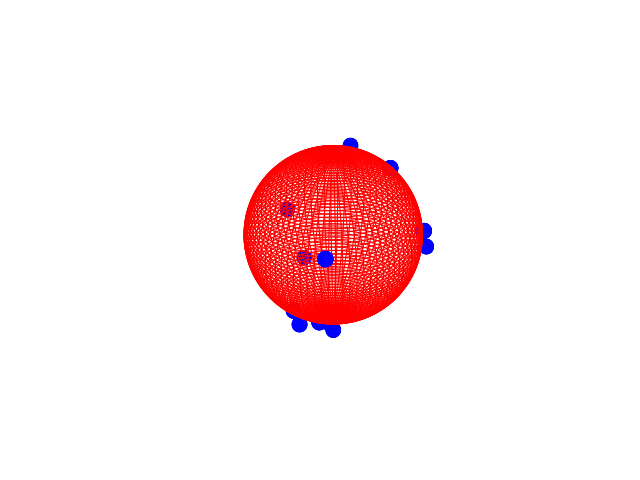

In [16]:
%matplotlib notebook
fig = pylab.figure()
ax = fig.gca(projection='3d')
ax.set_aspect('equal')
ax.set_axis_off()
draw_sphere([0.0, 0.0, 0.0], 1.0, 'r', ax, 40)
centers = [[(1.0 + R) * pos[j] for j in range(3)] for pos in positions]
for center in centers:
    draw_sphere(center, R, 'b', ax, 10)
ax.set_xlim(-1.0 - 2.0 * R, 1.0 + 2.0 * R)
ax.set_ylim(-1.0 - 2.0 * R, 1.0 + 2.0 * R)
ax.set_zlim(-1.0 - 2.0 * R, 1.0 + 2.0 * R)
pylab.show()

In [17]:
x, y, z = [[(1.0 + R) * pos[j] for pos in positions] + [0.0] for j in range(3)]
rad = [2.0 * R for pos in positions] + [2.0]
mayavi.mlab.figure(bgcolor=(0.9, 0.9, 1), size=(1000, 700))
mayavi.mlab.points3d(x, y, z, rad, scale_factor=1, resolution=100)
mayavi.mlab.show()

## Direct sampling: number of trials, for fixed value of $r$

In [18]:
N = 13
r = 0.25
attempts = 0
while True:
    attempts += 1
    positions = [unit_sphere() for j in range(N)]
    dists = [math.sqrt(sum((positions[k][j] - positions[l][j]) ** 2 for j in range(3))) 
             for l in range(N)
             for k in range(l)]
    if min(dists) > 2.0 * r:
        break
print attempts, 'trials required'

970 trials required


<IPython.core.display.Javascript object>


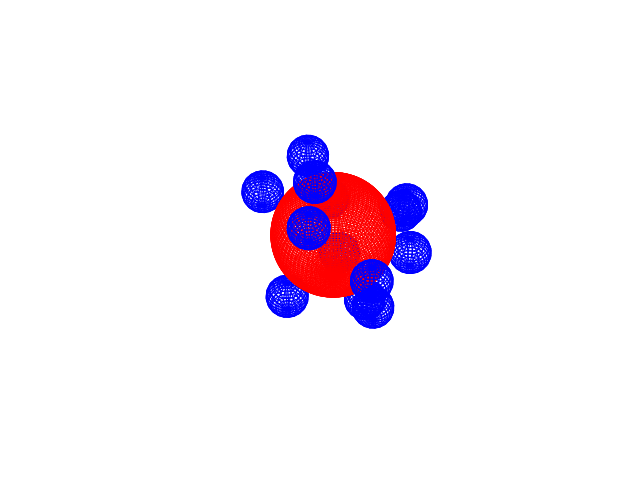

In [21]:
R = 1.0 / (1.0 / r - 1.0)

fig = pylab.figure()
ax = fig.gca(projection='3d')
ax.set_aspect('equal')
ax.set_axis_off()
draw_sphere([0.0, 0.0, 0.0], 1.0, 'r', ax, 40)
centers = [[(1.0 + R) * pos[j] for j in range(3)] for pos in positions]
for center in centers:
    draw_sphere(center, R, 'b', ax, 10)
ax.set_xlim(-1.0 - 2.0 * R, 1.0 + 2.0 * R)
ax.set_ylim(-1.0 - 2.0 * R, 1.0 + 2.0 * R)
ax.set_zlim(-1.0 - 2.0 * R, 1.0 + 2.0 * R)
pylab.show()

In [22]:
R = 1.0 / (1.0 / r - 1.0)
x, y, z = [[(1.0 + R) * pos[j] for pos in positions] + [0.0] for j in range(3)]
rad = [2.0 * R for pos in positions] + [2.0]
mayavi.mlab.figure(bgcolor=(0.9, 0.9, 1), size=(1000, 700))
mayavi.mlab.points3d(x, y, z, rad, scale_factor=1, resolution=100)
mayavi.mlab.show()

## MCMC sampling

In [23]:
N = 13
r = 0.3
nsteps = 10000
sigma  = 0.4
while True:
    positions = [unit_sphere() for j in range(N)] 
    dists = [math.sqrt(sum((positions[k][j] - positions[l][j]) ** 2 for j in range(3))) 
             for l in range(N) 
             for k in range(l)]
    if min(dists) > 2.0 * r: 
        break

n_acc = 0

for step in range(nsteps):
    k = random.randint(0, N - 1)
    newpos = [positions[k][j] + random.gauss(0.0, sigma) for j in range(3)]
    norm = math.sqrt(sum(xk ** 2 for xk in newpos))
    newpos = [xk / norm for xk in newpos]
    new_min_dist = min([math.sqrt(sum((positions[l][j] - newpos[j]) ** 2 \
                 for j in range(3))) for l in range(k) + range(k + 1, N)])
    if new_min_dist > 2.0 * r:
        positions = positions[:k] + [newpos] + positions[k + 1:]
        n_acc += 1
print 'acceptance rate:', n_acc / float(nsteps)

acceptance rate: 0.4229


# Simulated annealing

In [24]:
def minimum_distance(positions, N):
    dists = [math.sqrt(sum((positions[k][j] - positions[l][j]) ** 2 \
             for j in range(3))) for l in range(N) for k in range(l)]
    return min(dists)

def resize_disks(positions, r, N, gamma):
    Upsilon = minimum_distance(positions, N) / 2.0
    r = r + gamma * (Upsilon - r)
    return r

In [25]:
N = 13
r = 0.2
nsteps = 1000000
sigma  = 0.25
gamma  = 0.05
while True: 
    positions = [unit_sphere() for j in range(N)] 
    if minimum_distance(positions, N) > 2.0 * r: 
        break

n_acc = 0

for step in range(nsteps):
    k = random.randint(0, N - 1)
    newpos = [positions[k][j] + random.gauss(0, sigma) for j in range(3)]
    norm = math.sqrt(sum(xk ** 2 for xk in newpos))
    newpos = [xk / norm for xk in newpos]
    new_min_dist = min([math.sqrt(sum((positions[l][j] - newpos[j]) ** 2 for j in range(3))) 
                        for l in range(k) + range(k + 1, N)])
    if new_min_dist > 2.0 * r:
        positions = positions[:k] + [newpos] + positions[k+1:]
        n_acc += 1
    if step % 100 == 0:
        acc_rate = n_acc / float(100)
        n_acc = 0
        if acc_rate < 0.5:
            sigma *= 0.5
        r = resize_disks(positions, r, N, gamma)
        R = 1.0 / (1.0 / r - 1.0)
        density = 1.0 * N / 2.0 * (1.0 - math.sqrt(1.0 - r ** 2))
print
print 'Final r = %0.5f'%r + '  Final R = %0.5f'%R + '  Final density = %0.5f'%density


Final r = 0.47361  Final R = 0.89973  Final density = 0.77522


<IPython.core.display.Javascript object>


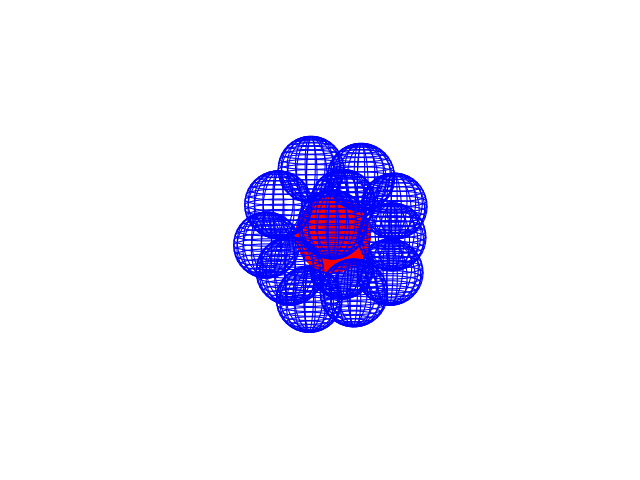

In [26]:
R = 1.0 / (1.0 / r - 1.0)

fig = pylab.figure()
ax = fig.gca(projection='3d')
ax.set_aspect('equal')
ax.set_axis_off()
draw_sphere([0.0, 0.0, 0.0], 1.0, 'r', ax, 40)
centers = [[(1.0 + R) * pos[j] for j in range(3)] for pos in positions]
for center in centers:
    draw_sphere(center, R, 'b', ax, 10)
ax.set_xlim(-1.0 - 2.0 * R, 1.0 + 2.0 * R)
ax.set_ylim(-1.0 - 2.0 * R, 1.0 + 2.0 * R)
ax.set_zlim(-1.0 - 2.0 * R, 1.0 + 2.0 * R)
pylab.show()

In [27]:
R = 1.0 / (1.0 / r - 1.0)
x, y, z = [[(1.0 + R) * pos[j] for pos in positions] + [0.0] for j in range(3)]
rad = [2.0 * R for pos in positions] + [2.0]
mayavi.mlab.figure(bgcolor=(0.9, 0.9, 1), size=(1000, 700))
mayavi.mlab.points3d(x, y, z, rad, scale_factor=1, resolution=100)
mayavi.mlab.show()